In [0]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab

import warnings
warnings.filterwarnings('ignore')

# Случайные и псевдослучайные числа. Вероятность

### Случайная величина

Случайное событие –  событие (А), которое либо происходит, либо не происходит (при определенной совокупности условий)

Случайная величина – это численное выражение результата случайного события (переменная)

Вероятность P(А) – степень возможности наступления некоторого случайного события А (относительная мера, количественная оценка) 

Относительная Частота – W(A)=m/n, 
где m – число появления событий А,
n – общее число испытаний 

При больших n W(A)🡪P(А)

### Терминология

- **Достоверное (невозможное) событие** – обязательно происходящее (заведомо не происходящее) при определенной совокупности условий
- **Совместные (несовместные) события** – появление одного из них не исключает (исключает) появление других в одном и том же испытании
- **Зависимые (независимые) события** – появление одного из них влияет (не влияет) на появление других
- **Противоположное (дополнительное) событие** –состоит в непоявлении события А
- **Полная группа событий** – такая совокупность событий, что в результате опыта обязательно должно произойти хотя бы одно из событий этой совокупности

### Теоремы теории вероятности

- Если А и В несовместны: Р(А+В) = Р(А) + Р(В) 
- Если А, В, … – полная группа несовместных событий, то  Р(А) + Р(В) +  …. = 1
- Для противоположных событий: Р(А) + Р(В)  =  1
- Если А и В независимы:  Р(АВ) = Р(А)*Р(В)
- Если А и В зависимы:   Р(АВ) = Р(А)*Р(В/A)


### Метод Монте-Карло

In [0]:
# Генерация псевдослучайного числа
np.random.uniform(0,1)

0.28072341377749754

In [0]:
# Реализация метода Монте-Карло при подбрасывании монеты
for i in range(0, 5):
    a = input('Нажмите Enter')
    x = np.random.uniform(0, 10)
    if x<5:
        print("орел")
    else:
        print("решка")

Нажмите Enter
орел
Нажмите Enter
орел
Нажмите Enter
решка
Нажмите Enter
орел
Нажмите Enter
решка


# Законы распределения

### Закон распределения случайной величины


### Плотность вероятности и функция распределения


Генерация заданного количества псевдослучайных чисел

In [0]:
# (если в параметр будет задано несколько чисел - то будет матрица)
np.random.rand(5)

array([0.32420535, 0.39431966, 0.44757057, 0.19168675, 0.40983856])

Подсчет количества выпадений того или иного значения

In [0]:
k,m = 0, 0  # начальные значения (k - орел, m - решка)
n = 100  # объем выборки 
for i in range(0, n):
    x = np.random.uniform(0, 10)
    if x<5:
        k = k + 1  
    else:
        m = m + 1
print('Итого выпало:\n{} раз "орел"\n{} раз "решка"'.format(k,m))

Итого выпало:
52 раз "орел"
48 раз "решка"


### Построение гистограммы

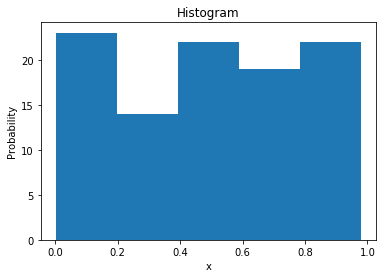

In [0]:
x = np.random.rand(100)  # 1000 - объем выборки
num_bins = 5  # количество бинов
n, bins, patches = plt.hist(x, num_bins)
plt.xlabel('x')
plt.ylabel('Probability')
plt.title('Histogram');

### Среднее, дисперсия, стандартное отклонение

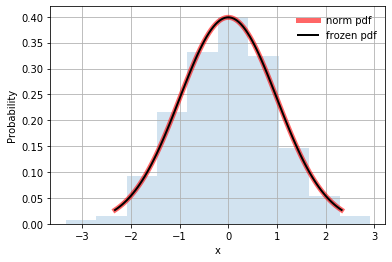

In [0]:
from scipy.stats import norm
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 1)
mean, var, skew, kurt = norm.stats(moments='mvsk')
x = np.linspace(norm.ppf(0.01),norm.ppf(0.99), 100)
ax.plot(x, norm.pdf(x),'r-', lw=5, alpha=0.6, label='norm pdf')

rv = norm()
ax.plot(x, rv.pdf(x), 'k-', lw=2, label='frozen pdf')

vals = norm.ppf([0.001, 0.5, 0.999])
np.allclose([0.001, 0.5, 0.999], norm.cdf(vals))
r = norm.rvs(size=1000)
ax.hist(r, density=True, histtype='stepfilled', alpha=0.2)
ax.legend(loc='best', frameon=False)
plt.grid()
plt.xlabel('x')
plt.ylabel('Probability')
plt.show()

# Последовательность независимых испытаний

Пример: модель Монте-Карло в Python

Задача - какова вероятность вываления "орла" монеткой 2 раза подряд?

In [0]:
k,n = 0,10000  
# k - успех
# n - объем выборки
a = np.random.randint(0,2,n)  
# функция создает массив случайных чисел от 0 до 2 (не вкл), число элементов = n 
b = np.random.randint(0,2,n)
c = np.random.randint(0,2,n)
d = np.random.randint(0,2,n)
x = a+b+c+d
for i in range(0,n):
  if x[i] == 2:
    k = k+1
# print(a,b,c,d)
# print(x)
print('k={}, n={}, k/n={}'.format(k,n,k/n))

k=3764, n=10000, k/n=0.3764


Вывод всех возможных последовательостей испытаний

In [0]:
import itertools

In [0]:
n = 4  # количество подбрасываений монены
for p in itertools.product('01', repeat=n):
  print(''.join(p))

# Итого 16 возможных вариантов как 2^n = 2^4 = 16

0000
0001
0010
0011
0100
0101
0110
0111
1000
1001
1010
1011
1100
1101
1110
1111


# Краткое введение в комбинаторику

### Найдем число *размещений* 2 объектов из 4


In [0]:
for p in itertools.permutations('0123', 2):
  print(''.join(str(x) for x in p))

01
02
03
10
12
13
20
21
23
30
31
32


### Найдем число *сочетаний* 2 объектов из 4


In [0]:
for p in itertools.combinations('0123', 2):
  print(''.join(str(x) for x in p))

01
02
03
12
13
23


### Найдем число *перестановок* 2 объектов из 4


In [0]:
for p in itertools.product('01', repeat=4):
  print(''.join(p))

0000
0001
0010
0011
0100
0101
0110
0111
1000
1001
1010
1011
1100
1101
1110
1111


# Регрессия и метод наименьших квадратов

### Интерполяция

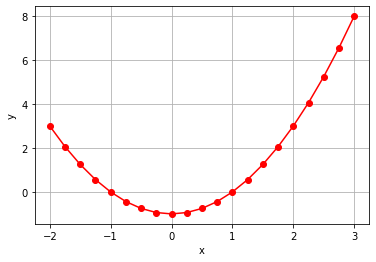

In [0]:
# Мы по точкам стороим график - инерполируем, 
# какой функции может соответствовать эти точки

x = np.linspace(-2,3,21)
plt.plot(x,x**2-1, 'ro-')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True);

### Регрессия

Коэффициент корреляции = 0.731549291168943


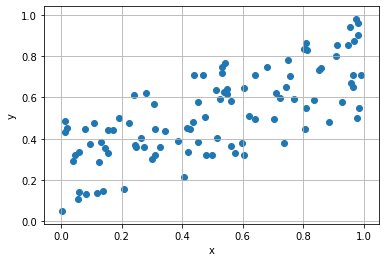

In [0]:
n = 100  # количество чисел
r = 0.5
x = np.random.rand(n)  # сгенерировали выборку из n случайных чисел
y = r*x + (1-r)*np.random.rand(n)
plt.scatter(x,y)
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True);

c = np.corrcoef(x,y)[0][1]
print('Коэффициент корреляции =',c)

Построение графика линейной регрессии


0.7340978923969007 0.13438554676689485 
 0.7340978923969002 0.13438554676689526
Коэффициент корреляции = 1.0


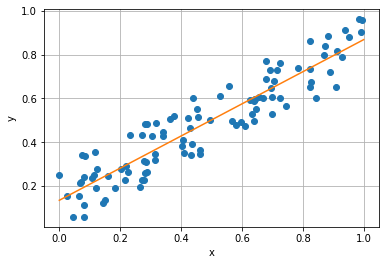

In [0]:
n = 100   # количество чисел
r = 0.7
x = np.random.rand(n)  # сгенерировали выборку из n случайных чисел
y = r*x + (1 - r)*np.random.rand(n)
plt.plot(x, y, 'o')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)

# 1 вариант расчета коэффициентов регресии (a и b)
a = (np.sum(x)*np.sum(y) - n*np.sum(x*y))/(np.sum(x)*np.sum(x) - n*np.sum(x*x))
b = (np.sum(y) - a*np.sum(x))/n

# 2 вариант расчета коэффициентов регресии (a и b)
A = np.vstack([x, np.ones(len(x))]).T
a1, b1 = np.linalg.lstsq(A, y)[0]

print(a, b,'\n',a1, b1)  # коэффицинты LR

x = np.linspace(0,1,20)
y = a*x + b
plt.plot(x,y);  # график LR

c = np.corrcoef(x,y)[0][1]
print('Коэффициент корреляции =',c)